In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import idx2numpy
from tensorflow.keras import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

In [143]:
our_numbers = pd.read_csv('numbers.csv')
our_numbers = our_numbers.drop(columns=['Unnamed: 0'], axis=1)
our_numbers = our_numbers[our_numbers["label"]!="X"]
our_numbers.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.000000,0.890196,0.615686,0.0,0.0,0.462745,1.0,4
1,1.0,1.0,1.0,1.0,0.980392,0.890196,0.890196,0.890196,0.890196,0.890196,...,1.0,1.0,0.717647,0.019608,0.000000,0.0,0.0,0.572549,1.0,7
2,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.462745,0.000000,0.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,7
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.337255,0.917647,0.917647,1.0,1.0,1.000000,1.0,2
4,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.976471,0.862745,0.862745,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3


In [144]:
set(our_numbers.iloc[:,-1].values)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [26]:
def partitioning(datos,size_S,size_T):
    """ 
        Método que hace el partitioning de los datos en el set de S, training, testing y validation
        Recibe:
            1. datos: Datos al cual se le va a hacer el partitioning
            2. Size_S: Tamaño del set S
            3. Size_T: Tamaño del set T (training)
        Entrega:
            1. S: Set S
            2. V: set de validación V
            3. T: set de training T
            4. t: set de testing t
    """
    indices_datos = np.arange(len(datos))

    indices_S = np.random.choice(indices_datos, size=int(round(len(datos)*size_S)),replace=False)
    indices_V = np.setdiff1d(indices_datos, indices_S)
    indices_T = np.random.choice(indices_S, size=int(round(len(datos)*size_T)),replace=False)
    indices_t = np.setdiff1d(indices_S, indices_T)

    S= datos[indices_S]
    
    V= datos[np.random.choice(indices_V, size=len(indices_V),replace=False)]
    T= datos[indices_T]
    t= datos[np.random.choice(indices_t, size=len(indices_t),replace=False)]

    return S,V,T,t

## Datos

In [146]:
train_x = idx2numpy.convert_from_file('train_images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train_labels.idx1-ubyte')
test_x = idx2numpy.convert_from_file('test_images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('test_labels.idx1-ubyte')
class_names = list(set(train_labels))

In [147]:
def show_images(train_images, class_names, train_labels, nb_samples =9, nb_row = 3):
    plt.figure(figsize=(9, 9))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

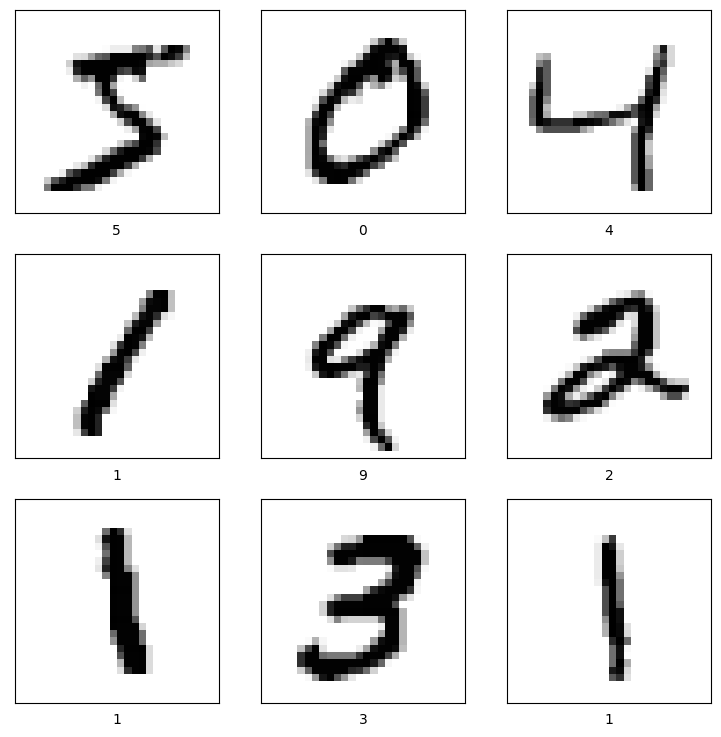

In [148]:
show_images(train_x, class_names, train_labels)

In [149]:
max_pixel_value = 255
train_images = train_x / max_pixel_value
test_images = test_x / max_pixel_value

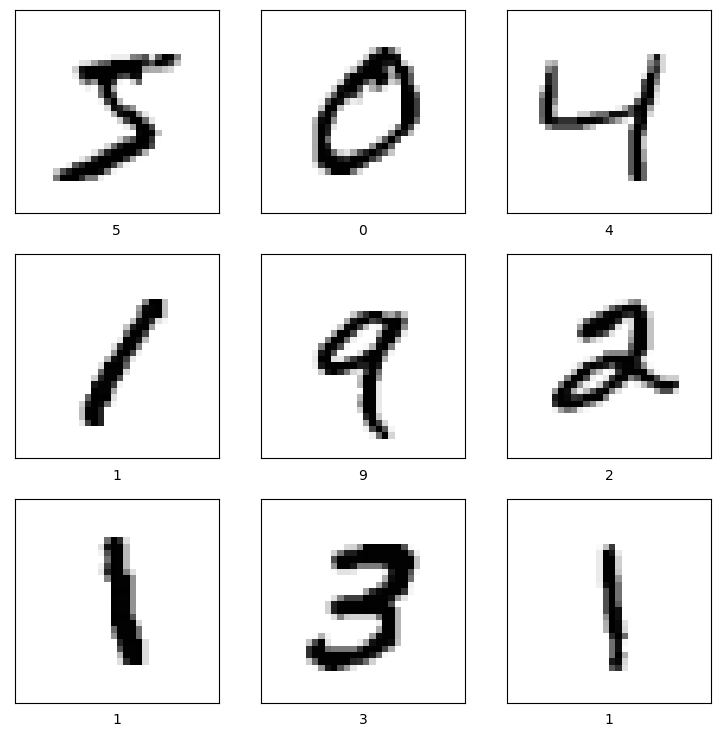

In [150]:
train_images = np.pad(train_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(train_images, class_names, train_labels)

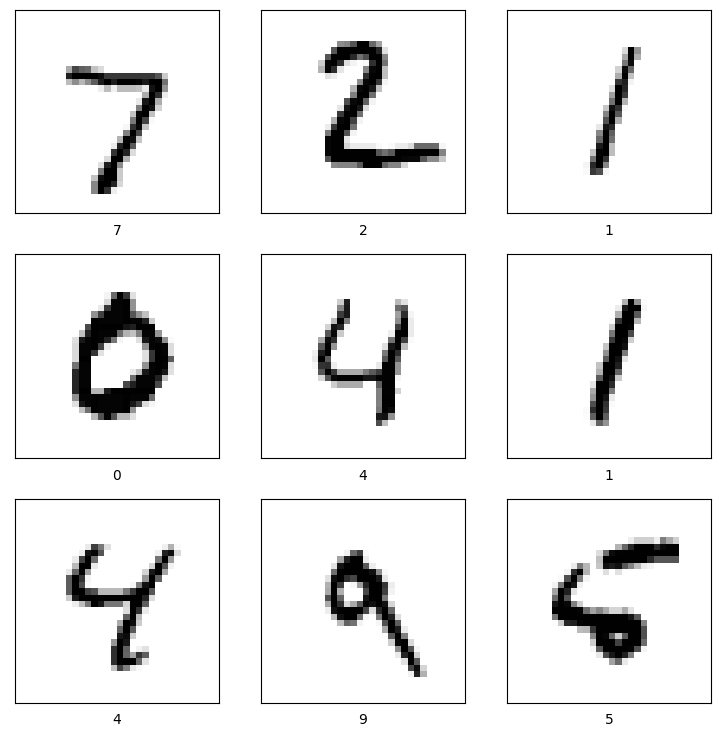

In [151]:
test_images = np.pad(test_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(test_images, class_names, test_labels)

In [11]:
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [12]:
INPUT_SHAPE = (32,32,1)
FILTER1_SIZE = 6
FILTER2_SIZE = 16
FILTER_SHAPE = (5, 5)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [14]:
BATCH_SIZE = 32
EPOCHS = 50

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9838 - precision: 0.9856 - recall: 0.9821 - val_loss: 0.0373 - val_accuracy: 0.9881 - val_precision: 0.9895 - val_recall: 0.9863
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0371 - accuracy: 0.9881 - precision: 0.9892 - recall: 0.9872 - val_loss: 0.0480 - val_accuracy: 0.9838 - val_precision: 0.9857 - val_recall: 0.9829
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9911 - precision: 0.9919 - recall: 0.9903 - val_loss: 0.0337 - val_accuracy: 0.9892 - val_precision: 0.9898 - val_recall: 0.9882
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0220 - accuracy: 0.9927 - precision: 0.9932 - recall: 0.9923 - val_loss: 0.0409 - val_accuracy: 0.9866 - val_precision: 0.9873 - val_recall: 0.9860
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0182 - accuracy: 0

In [37]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, color ='black',linestyle = '-.',label="Training "+metric_label)
	plt.plot(validation_perf, color = 'black',label = 'Testing '+str(metric_label))
	plt.axvline(x=intersection_idx, color='darkgrey', linestyle='--', label='Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='grey')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

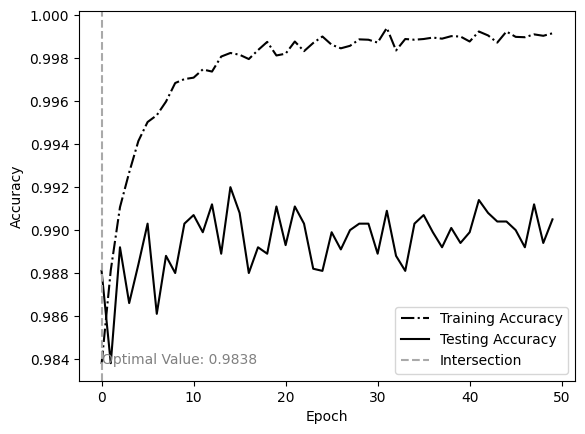

In [38]:
show_performance_curve(training_history, 'accuracy', 'Accuracy')

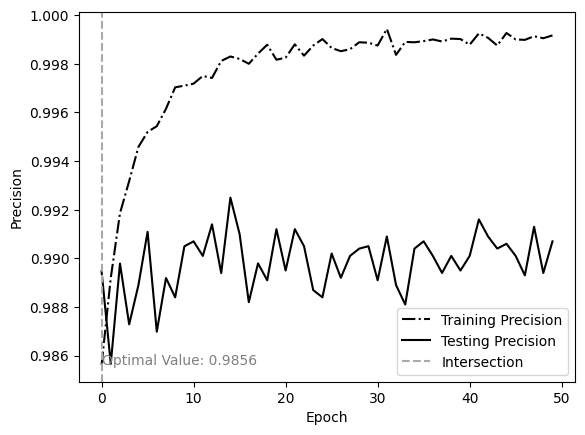

In [39]:
show_performance_curve(training_history, 'precision', 'Precision')

In [77]:
cm2 = cm
for i in range(len(cm)):
    for j in range(len(cm[i])):
        cm2[i,j]=cm[i,j]/sum(cm[i])

313/313 [==============================] - 0s 2ms/step


<Figure size 5000x5000 with 0 Axes>

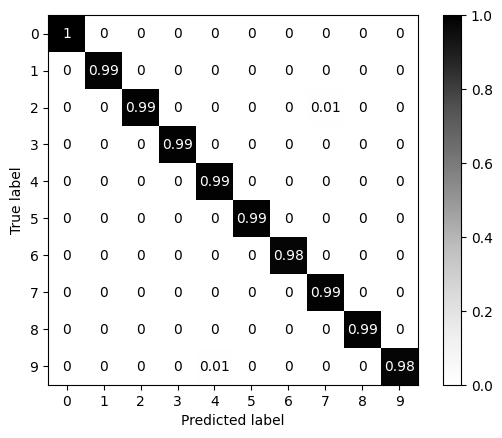

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)
sumas = np.sum(cm,axis=1)
cm2 = np.zeros(cm.shape)
for i in range(len(cm)):
    cm2[i] = np.round(cm[i]/sumas[i],2)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm2)

cmd.plot(include_values=True, cmap='Greys', ax=None, xticks_rotation='horizontal')
plt.show()

In [104]:
validation = our_numbers.iloc[:,:-1].values
validation = validation.reshape(714,28, 28)
validation_images =  (1-validation) / 1
validation_images = np.pad(validation_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)

In [105]:
predictions = model.predict(validation_images)

23/23 [==============================] - 0s 3ms/step


In [106]:
predicted_classes = predictions.argmax(axis=-1)

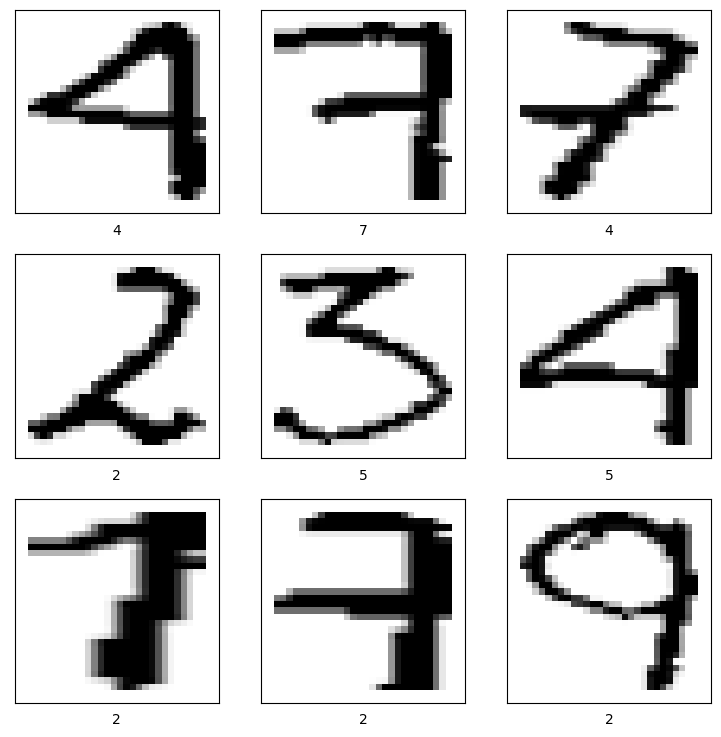

In [152]:
show_images(validation_images,class_names,predicted_classes)


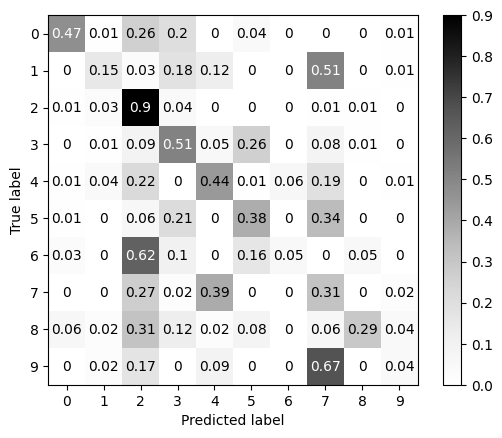

In [108]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix([int(i) for i in our_numbers.iloc[:,-1].values], predicted_classes)

sumas = np.sum(cm,axis=1)
cm2 = np.zeros(cm.shape)
for i in range(len(cm)):
    cm2[i] = np.round(cm[i]/sumas[i],2)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm2)

cmd.plot(include_values=True, cmap='Greys', ax=None, xticks_rotation='horizontal')
plt.show()



GAN

In [1]:
### install necessary packages if in colab
def run_subprocess_command(cmd):
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    for line in process.stdout:
        print(line.decode().strip())


import sys, subprocess

IN_COLAB = "google.colab" in sys.modules
colab_requirements = ["pip install tf-nightly-gpu-2.0-preview==2.0.0.dev20190513"]
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd

/var/folders/bq/_pm3gptx09qgc2n6byhqt8zm0000gn/T/ipykernel_41335/2918812750.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
TRAIN_BUF=60000
BATCH_SIZE=512
TEST_BUF=10000
DIMS = (28,28,1)
N_TRAIN_BATCHES =int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)

In [5]:
# load dataset
#(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images = idx2numpy.convert_from_file('train_images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train_labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('test_images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('test_labels.idx1-ubyte')

# split dataset
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype(
    "float32"
) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0

# batch datasets
train_dataset = (
    tf.data.Dataset.from_tensor_slices(train_images)
    .shuffle(TRAIN_BUF)
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset.from_tensor_slices(test_images)
    .shuffle(TEST_BUF)
    .batch(BATCH_SIZE)
)

In [6]:
class GAN(tf.keras.Model):
    """ a basic GAN class 
    Extends:
        tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(GAN, self).__init__()
        self.__dict__.update(kwargs)

        self.gen = tf.keras.Sequential(self.gen)
        self.disc = tf.keras.Sequential(self.disc)

    def generate(self, z):
        return self.gen(z)

    def discriminate(self, x):
        return self.disc(x)

    def compute_loss(self, x):
        """ passes through the network and computes loss
        """
        # generating noise from a uniform distribution
        z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])

        # run noise through generator
        x_gen = self.generate(z_samp)
        # discriminate x and x_gen
        logits_x = self.discriminate(x)
        logits_x_gen = self.discriminate(x_gen)
        ### losses
        # losses of real with label "1"
        disc_real_loss = gan_loss(logits=logits_x, is_real=True)
        # losses of fake with label "0"
        disc_fake_loss = gan_loss(logits=logits_x_gen, is_real=False)
        disc_loss = disc_fake_loss + disc_real_loss

        # losses of fake with label "1"
        gen_loss = gan_loss(logits=logits_x_gen, is_real=True)

        return disc_loss, gen_loss

    def compute_gradients(self, x):
        """ passes through the network and computes loss
        """
        ### pass through network
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            disc_loss, gen_loss = self.compute_loss(x)

        # compute gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        return gen_gradients, disc_gradients

    def apply_gradients(self, gen_gradients, disc_gradients):

        self.gen_optimizer.apply_gradients(
            zip(gen_gradients, self.gen.trainable_variables)
        )
        self.disc_optimizer.apply_gradients(
            zip(disc_gradients, self.disc.trainable_variables)
        )
    @tf.function
    def train(self, train_x):
        gen_gradients, disc_gradients = self.compute_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)
        
        
def gan_loss(logits, is_real=True):
    """Computes standard gan loss between logits and labels
    """
    if is_real:
        labels = tf.ones_like(logits)
    else:
        labels = tf.zeros_like(logits)

    return tf.compat.v1.losses.sigmoid_cross_entropy(
        multi_class_labels=labels, logits=logits
    )

In [7]:
N_Z = 64
generator = [
    tf.keras.layers.Dense(units=7 * 7 * 64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"
    ),
]

discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=None),
]

In [8]:
# optimizers
#gen_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5)
#disc_optimizer = tf.keras.optimizers.RMSprop(0.005)# train the model
gen_optimizer = tf.keras.optimizers.legacy.Adam(0.001, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.legacy.RMSprop(0.005)# train the model

# model
model = GAN(
    gen = generator,
    disc = discriminator,
    gen_optimizer = gen_optimizer,
    disc_optimizer = disc_optimizer,
    n_Z = N_Z
)

In [9]:
# exampled data for plotting results
def plot_reconstruction(model, nex=8, zm=2):
    samples = model.generate(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    fig, axs = plt.subplots(ncols=nex, nrows=1, figsize=(zm * nex, zm))
    for axi in range(nex):
        axs[axi].matshow(
                    samples.numpy()[axi].squeeze(), cmap=plt.cm.Greys, vmin=0, vmax=1
                )
        axs[axi].axis('off')
    plt.show()

In [10]:
# a pandas dataframe to save the loss information to
losses = pd.DataFrame(columns = ['disc_loss', 'gen_loss'])

Epoch: 0 | disc_loss: 0.8353047966957092 | gen_loss: 1.4300298690795898


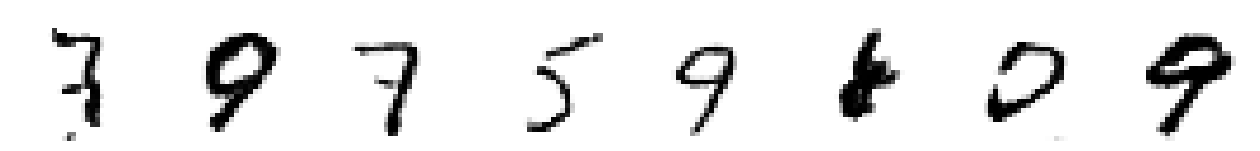

In [13]:
n_epochs = 1
for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES
    ):
        model.train(train_x)
        
    # test on holdout
    loss = []
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES
    ):
        loss.append(model.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print(
        "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
            epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1]
        )
    )
    plot_reconstruction(model)

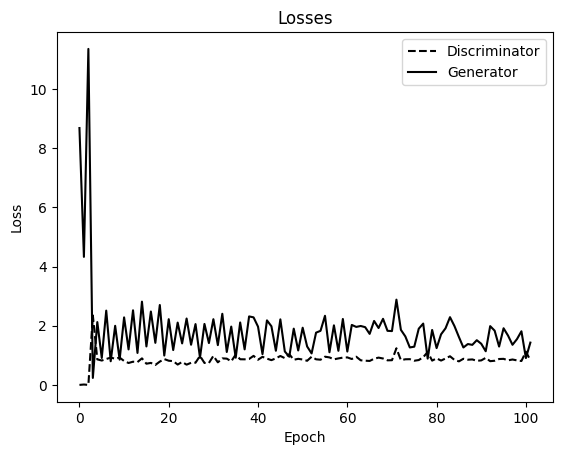

In [29]:
n_epochs = 102
plt.plot(np.arange(n_epochs),losses['disc_loss'], linestyle = "--", color = 'black', label='Discriminator')
plt.plot(np.arange(n_epochs),losses['gen_loss'], color = 'black', label='Generator')
plt.title("Losses")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Predicting our number with GAN

In [16]:
our_numbers = pd.read_csv('numbers.csv')
our_numbers = our_numbers.drop(columns=['Unnamed: 0'], axis=1)
our_numbers = our_numbers[our_numbers["label"]!="X"]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.000000,0.890196,0.615686,0.0,0.0,0.462745,1.0,4
1,1.0,1.0,1.0,1.0,0.980392,0.890196,0.890196,0.890196,0.890196,0.890196,...,1.0,1.0,0.717647,0.019608,0.000000,0.0,0.0,0.572549,1.0,7
2,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.462745,0.000000,0.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,7
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.337255,0.917647,0.917647,1.0,1.0,1.000000,1.0,2
4,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.976471,0.862745,0.862745,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3


In [17]:
validation = our_numbers.iloc[:,:-1].values
validation = validation.reshape(714,28, 28,1)
validation_images =  (1-validation) / 1

In [18]:
out = model.discriminate(validation_images)
out = (np.round(out)).reshape(len(out))
out = out.astype(int)

In [27]:
is_reals = []
for i in range(50):

    x,_,_,_ =partitioning(validation_images,0.2,0.1)

    logits_x = model.discriminate(x)

    is_real_likelihood = gan_loss(logits=logits_x, is_real=True)
    is_reals.append(is_real_likelihood)


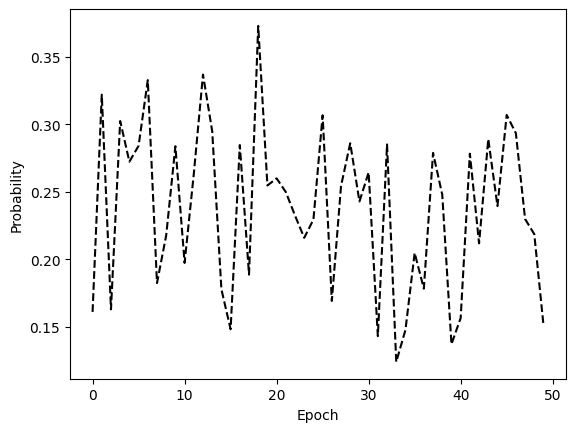

In [28]:
plt.plot(is_reals, color='black', linestyle = '--')
plt.xlabel('Epoch')
plt.ylabel('Probability')
plt.show()